<a href="https://colab.research.google.com/github/PadalaKavya/MajorProject/blob/master/MP_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
# Checking for null values
np.sum(df.isnull())

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
# storing the data in lists
tweet, type = list(df['tweet_text']), list(df['cyberbullying_type'])

In [ ]:
df.iloc[0][0]

'In other words #katandandre, your food was crapilicious! #mkr'

In [ ]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['cyberbullying_type_encoded'] = labelencoder.fit_transform(df['cyberbullying_type'])

# **PREPROCESSING**

In [ ]:
import string
string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['tweet_text']= df['tweet_text'].apply(lambda x:remove_punctuation(x))
df.head()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,In other words katandandre your food was crapi...,not_cyberbullying,3
1,Why is aussietv so white MKR theblock ImACeleb...,not_cyberbullying,3
2,XochitlSuckkks a classy whore Or more red velv...,not_cyberbullying,3
3,JasonGio meh P thanks for the heads up but no...,not_cyberbullying,3
4,RudhoeEnglish This is an ISIS account pretendi...,not_cyberbullying,3


In [ ]:
df['tweet_text']= df['tweet_text'].apply(lambda x: x.lower())

In [ ]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['tweet_text']= df['tweet_text'].apply(lambda x: tokenization(x))

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
df['tweet_text']= df['tweet_text'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
df['tweet_text']=df['tweet_text'].apply(lambda x: stemming(x))

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
df['tweet_text']=df['tweet_text'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


# **VISUALZATION**

In [ ]:
new_df = df
new_df = new_df[new_df['cyberbullying_type'] != 'other_cyberbullying']
new_df = new_df[new_df['cyberbullying_type'] != 'not_cyberbullying']
new_df = new_df['tweet_text'].apply(lambda x: " ".join(x))

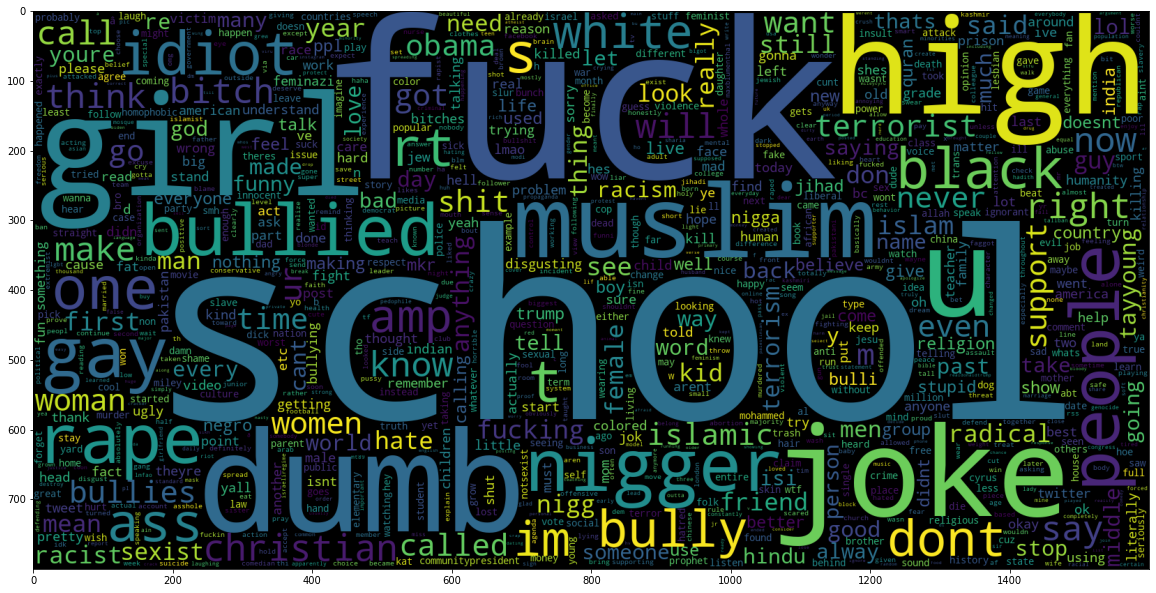

In [ ]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(new_df))
plt.imshow(wc)

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.layers import *
from keras.models import *
from keras_preprocessing.sequence import pad_sequences
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset but only keep the top 6000 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=6000)
# pad input sequences
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)
#model
model = Sequential()
model.add(Embedding(6000, 32, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           192000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 51.24%


In [ ]:
embedding_vector_features=45

model=Sequential()

model.add(Embedding(6000,32,input_length=500))

model.add(LSTM(128,activation='relu',return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))

model.add(Dropout(0.2))

# for units in [128,128,64,32]:

# model.add(Dense(units,activation='relu'))

# model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(4,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           192000    
                                                                 
 lstm_1 (LSTM)               (None, 500, 128)          82432     
                                                                 
 dropout (Dropout)           (None, 500, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=6000)
# pad input sequences
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=120,batch_size=64)


Epoch 1/120
391/391 [==============================] - 1279s 3s/step - loss: nan - accuracy: 0.4990 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/120
391/391 [==============================] - 1270s 3s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/120
391/391 [==============================] - 1300s 3s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/120
391/391 [==============================] - 1287s 3s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/120
391/391 [==============================] - 1298s 3s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/120
391/391 [==============================] - 1293s 3s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/120
391/391 [==============================] - 1308s 3s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/120
391/391 [======